In [1]:
import pandas as pd
import numpy as np

In [3]:
# read csv data into variable
bicycle_data = pd.read_csv('data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv')

In [4]:
bicycle_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


In [5]:
# create column 'Total', which is (East + West) bicycle count
bicycle_data['Total'] = bicycle_data['Fremont Bridge East Sidewalk'] + bicycle_data['Fremont Bridge West Sidewalk']

In [6]:
bicycle_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0


In [20]:
# function to return datetime object from string
def datetime_parse(date_str):
    # remove 'PM'
    date_str = date_str[:-3]
    # split date and time
    date, time = date_str.split(" ")
    # return dictionary: (month, date, year, hour, minutes, seconds)
    month, date, year = date.split("/")
    hour, minutes, seconds = time.split(":")
    x = dict();
    x['month'] = int(month)
    x['date'] = int(date)
    x['year'] = int(year)
    x['hour'] = int(hour)
    x['minutes'] = int(minutes)
    x['seconds'] = int(seconds)
    return x

def hour_parse(date_str):
    return datetime_parse(date_str)['hour']

# test this out
hour_parse('03/31/2019 09:00:00 PM')

9

In [21]:
# create column 'Hour of day', which is the hour extracted from 'Date'
bicycle_data['Hour of day'] = bicycle_data['Date'].apply(hour_parse)
bicycle_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour of day
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,11
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,10
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,9
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,8
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,7


In [22]:
def year_parse(date_str):
    return datetime_parse(date_str)['year']

# create column 'Year', which is the year extracted from 'Date'
bicycle_data['Year'] = bicycle_data['Date'].apply(year_parse)
bicycle_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour of day,Year
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,11,2019
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,10,2019
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,9,2019
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,8,2019
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,7,2019


In [23]:
# Create a dataframe with the subset of data from the year 2016
bicycle_data_2016 = bicycle_data.loc[bicycle_data['Year'] == 2016]
bicycle_data_2016.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour of day,Year
19680,12/31/2016 11:00:00 PM,4.0,4.0,8.0,11,2016
19681,12/31/2016 10:00:00 PM,7.0,8.0,15.0,10,2016
19682,12/31/2016 09:00:00 PM,4.0,6.0,10.0,9,2016
19683,12/31/2016 08:00:00 PM,3.0,6.0,9.0,8,2016
19684,12/31/2016 07:00:00 PM,6.0,4.0,10.0,7,2016


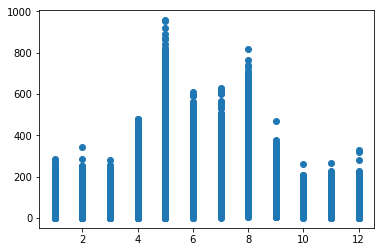

In [41]:
# Use pandas + matplotlib to plot the counts by hour. 
# (i.e. hour of the day on the x-axis, total daily counts on the y-axis)
from matplotlib import pyplot as plt

plt.scatter(bicycle_data_2016['Hour of day'], bicycle_data_2016['Total'])

In [56]:
# Use pandas to determine what is (on average) the busiest hour of the day
for i in range(1,13):
    tmp = bicycle_data_2016.loc[bicycle_data_2016['Hour of day'] == i]
    print('Hour', i, 'average total count: ', tmp['Total'].mean())

Hour 1 average total count:  48.28825136612022
Hour 2 average total count:  51.54035567715458
Hour 3 average total count:  66.78005464480874
Hour 4 average total count:  116.22677595628416
Hour 5 average total count:  213.3879781420765
Hour 6 average total count:  179.0136612021858
Hour 7 average total count:  186.0
Hour 8 average total count:  202.81967213114754
Hour 9 average total count:  116.62158469945355
Hour 10 average total count:  62.84289617486339
Hour 11 average total count:  50.19125683060109
Hour 12 average total count:  48.53005464480874


We can see that 5 PM is the busiest hour, with an average total count of around 213.